In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# Define the linear regression model.
# X @ W + b
class LinearRegression(nn.Module):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(1, 1, bias=True)
    
  def forward(self, X):
    return self.linear(X)

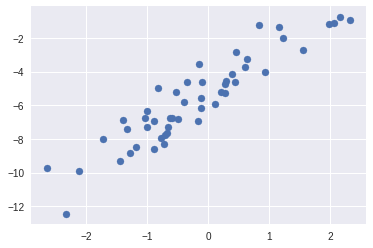

In [3]:
# Generate an input data for the model.
X = np.array([[np.random.randn() ]for i in range(50)], dtype=np.float32)
y = np.array([[2 * X[i] - 5 + np.random.randn()] for i in range(len(X))], dtype=np.float32)

plt.scatter(X, y);

In [4]:
lr = LinearRegression()
print(lr)

# Cast numpy arrays to Tensor.
X = torch.from_numpy(X)
y = torch.from_numpy(y)

# Define loss function and optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(lr.parameters(), lr=0.001)

inputs = Variable(X)
target = Variable(y)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
n_epochs = 10000

loss_history = []

for i in range(n_epochs):  
  preds = lr(inputs)
  loss = criterion(preds, target[:, 0])
  loss_history.append(loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  
  if i % 1000 == 0:
    print('Epoch : {} -- Loss : {}'.format(i, loss))

Epoch : 0 -- Loss : 47.35481262207031
Epoch : 1000 -- Loss : 1.553391695022583
Epoch : 2000 -- Loss : 0.9845996499061584
Epoch : 3000 -- Loss : 0.971330463886261
Epoch : 4000 -- Loss : 0.9709705710411072
Epoch : 5000 -- Loss : 0.9709606170654297
Epoch : 6000 -- Loss : 0.9709604382514954
Epoch : 7000 -- Loss : 0.9709604382514954
Epoch : 8000 -- Loss : 0.9709604382514954
Epoch : 9000 -- Loss : 0.9709604382514954


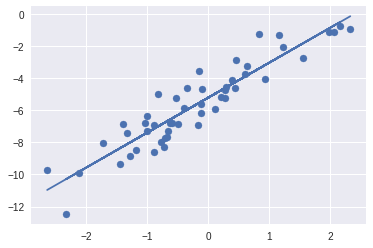

In [6]:
# We make prediction on the input data and then plot the
# fitted line.

preds = lr(inputs)
# Currently preds variable's grad is activated. We should detach it.
preds = preds.detach().numpy()
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), preds)
plt.show()

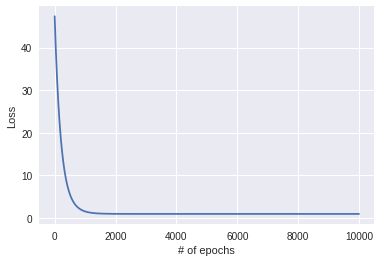

In [7]:
# Plotting the loss history.
plt.plot(np.arange(n_epochs), loss_history)
plt.xlabel('# of epochs')
plt.ylabel('Loss')
plt.show()